# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Loading the data

In [2]:
# Read the data 
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Checking Null Values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Statistical Analysis 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data visualisations

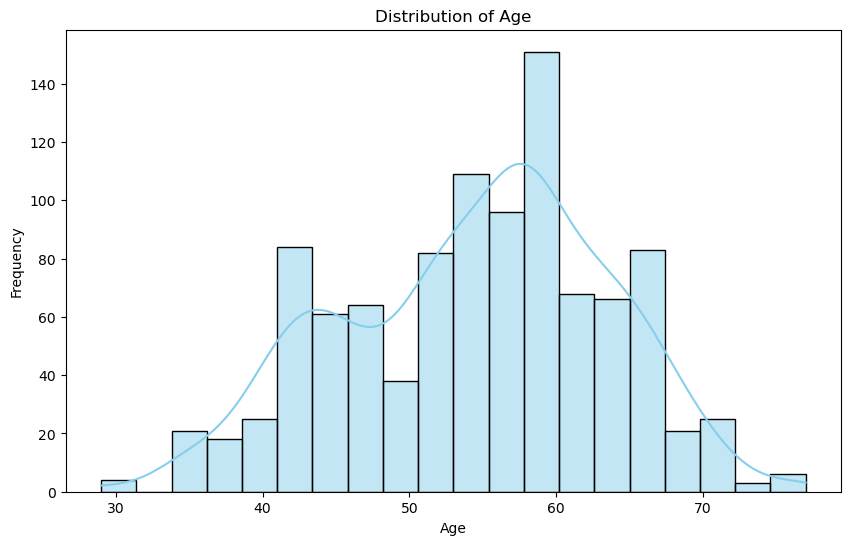

In [7]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

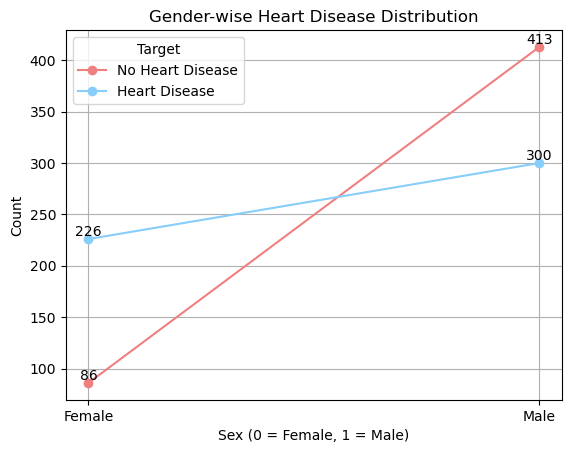

In [8]:
# Calculate the count of each target category for each gender
gender_target_counts = data.groupby(['sex', 'target']).size().unstack(fill_value=0)

# Plotting line chart
plt.figure(figsize=(10, 6))
gender_target_counts.plot(kind='line', marker='o', color=['lightcoral', 'lightskyblue'])

# Adding counts as text labels to each data point
for col in gender_target_counts.columns:
    for i, val in enumerate(gender_target_counts[col]):
        plt.text(i, val, str(val), ha='center', va='bottom', color='black')

plt.title('Gender-wise Heart Disease Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(range(len(gender_target_counts.index)), ['Female', 'Male'])
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True)
plt.show()

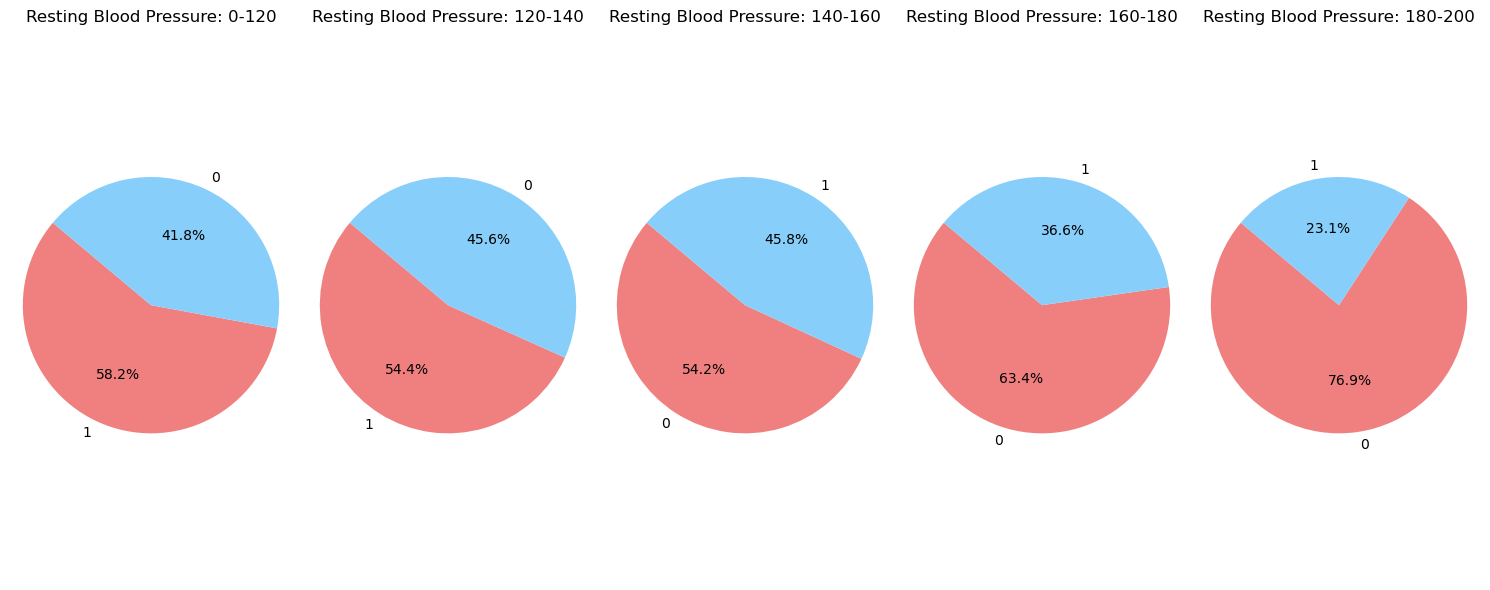

In [9]:
# Define the ranges for resting blood pressure
trestbps_ranges = [(0, 120), (120, 140), (140, 160), (160, 180), (180, 200)]

# Create a subplot grid
fig, axs = plt.subplots(1, len(trestbps_ranges), figsize=(15, 6))

# Create subsets based on trestbps ranges and calculate target counts
for i, trestbps_range in enumerate(trestbps_ranges):
    subset = data[(data['trestbps'] >= trestbps_range[0]) & (data['trestbps'] < trestbps_range[1])]
    target_counts = subset['target'].value_counts()
    
    # Plotting pie chart for the current trestbps range
    axs[i].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
    axs[i].set_title(f'Resting Blood Pressure: {trestbps_range[0]}-{trestbps_range[1]}')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

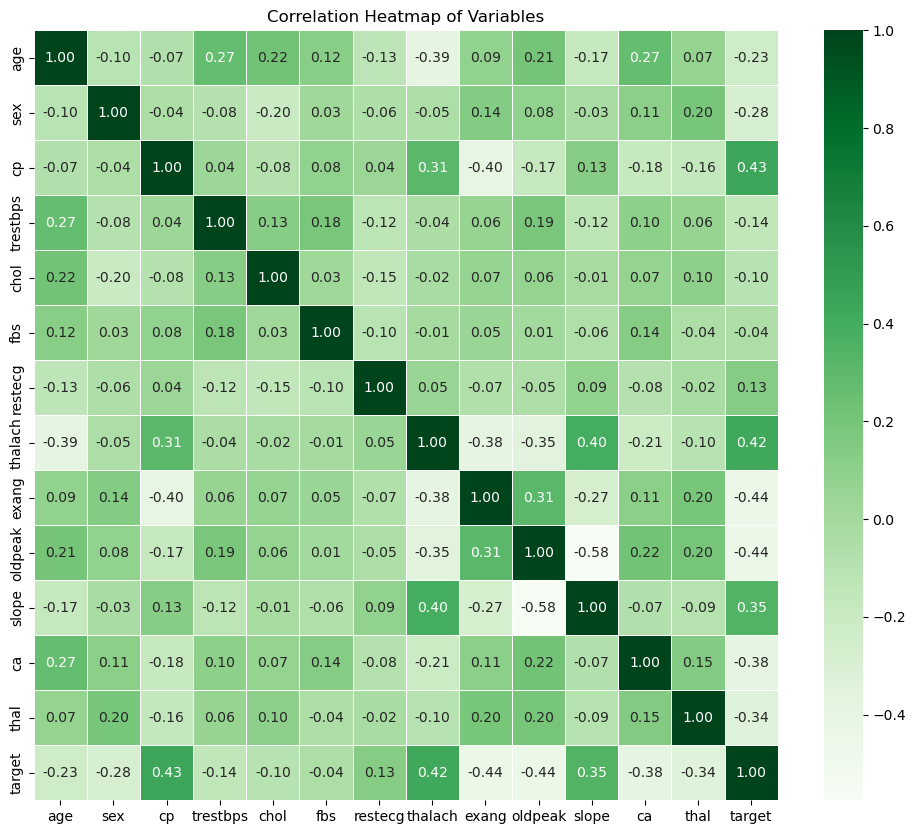

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

# Data Selection for Clustering

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting variables for clustering
selected_variables = ['trestbps', 'chol']

# Extracting selected variables from the original data
selected_data = data[selected_variables]

# Feature Selection

In [12]:
# Feature scaling
scaler = StandardScaler()
scaled_selected_data = scaler.fit_transform(selected_data)

# PCA

In [13]:
pca_selected = PCA(n_components=2)
pca_selected.fit(scaled_selected_data)
scores_pca_selected = pca_selected.transform(scaled_selected_data)

# Exploring number of clusters by elbow method

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression

C:\Users\deban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Fitted Line Equation: y = -158.9747017028705 x + [1635.28977962]


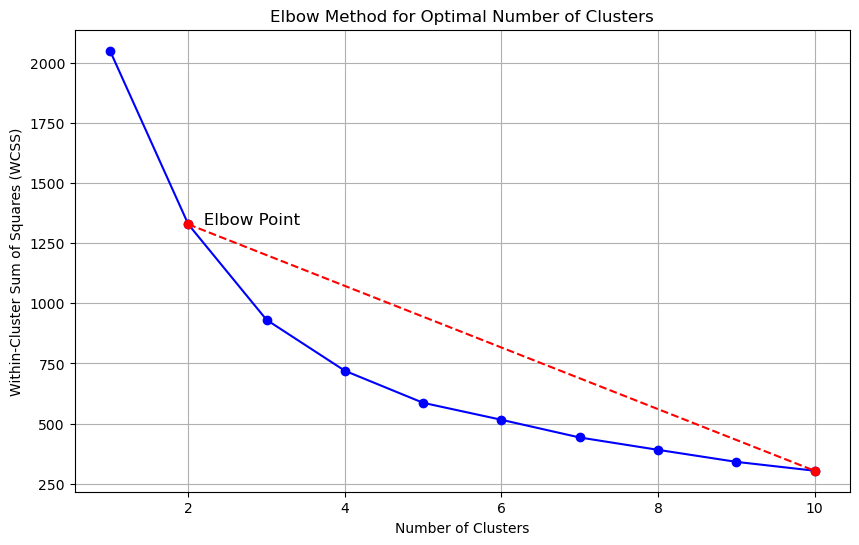

In [15]:
# Fitting KMeans with different number of clusters
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca_selected)
    wcss.append(kmeans.inertia_)

# Elbow Method with Fitted Line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Fit a line to the elbow curve
x1, y1 = 2, wcss[1]
x2, y2 = 10, wcss[len(wcss) - 1]

# Fit a line to the elbow curve
x = np.array(range(1, 11)).reshape(-1, 1)
y = np.array(wcss).reshape(-1, 1)

# Fitting linear regression
regression = LinearRegression()
regression.fit(x, y)

# Getting the slope and intercept of the fitted line
slope = regression.coef_[0][0]
intercept = regression.intercept_

# Print the equation of the fitted line
print("Fitted Line Equation: y =", slope, "x +", intercept)

plt.plot([x1, x2], [y1, y2], 'ro--')
plt.text(x1, y1, '   Elbow Point', fontsize=12)
plt.show()

# K-Means Clustering

In [16]:
# Determine the optimal number of clusters based on the elbow method, which is 3
optimal_num_clusters_selected = 3

# Initialize KMeans with the optimal number of clusters
kmeans_selected = KMeans(n_clusters=optimal_num_clusters_selected, init='k-means++', random_state=42)

In [17]:
# Fit KMeans to the selected data
kmeans_selected.fit(scores_pca_selected)

C:\Users\deban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [18]:
# Create a DataFrame with PCA scores and cluster labels for selected variables
cluster_data_selected = pd.DataFrame(scores_pca_selected, columns=['trestbps', 'chol'])
cluster_data_selected['Cluster_Label'] = kmeans_selected.labels_

In [19]:
# Display the DataFrame for selected variables
print(cluster_data_selected.head())

   trestbps      chol  Cluster_Label
0 -0.733247 -0.199190              0
1 -0.250849 -0.928409              0
2 -0.446569 -1.528002              0
3  0.072249 -1.251507              1
4  0.916196  0.400185              2


# Outcome of K-Means Clustering

C:\Users\deban\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\deban\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\deban\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


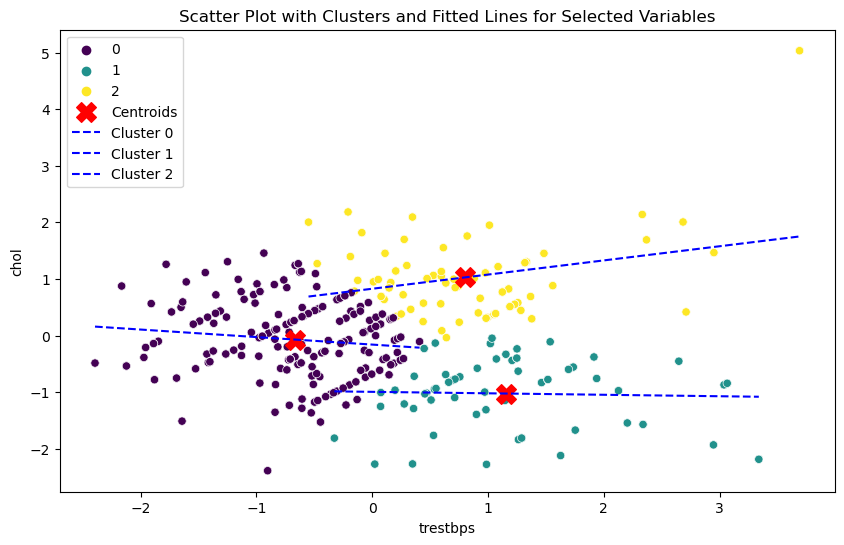

In [20]:
# Scatter plot with Clusters for selected variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='chol', data=cluster_data_selected, hue='Cluster_Label', palette='viridis', legend='full')

# Plotting the centroids for selected variables
centroids_selected = kmeans_selected.cluster_centers_
plt.scatter(centroids_selected[:, 0], centroids_selected[:, 1], marker='X', s=200, color='red', label='Centroids')

# Plotting the fitting lines for each cluster for selected variables
for i in range(optimal_num_clusters_selected):
    # Filter data points belonging to the current cluster
    cluster_points_selected = cluster_data_selected[cluster_data_selected['Cluster_Label'] == i]
    
    # Fit a linear regression line to the cluster points
    regression_cluster_selected = LinearRegression()
    regression_cluster_selected.fit(cluster_points_selected[['trestbps']], cluster_points_selected[['chol']])
    
    # Generate x values for the line of best fit
    x_values = np.linspace(min(cluster_points_selected['trestbps']), max(cluster_points_selected['trestbps']), num=100).reshape(-1, 1)
    
    # Plot the fitted line for selected variables
    plt.plot(x_values, regression_cluster_selected.predict(x_values), color='blue', linestyle='--', label=f'Cluster {i}')

plt.title('Scatter Plot with Clusters and Fitted Lines for Selected Variables')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.legend()
plt.show()

# Data Splitting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (X) and target variable (y)
X = data.drop('target', axis=1)  
y = data['target']

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Classification

In [23]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

In [24]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [26]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 98.54%


In [27]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



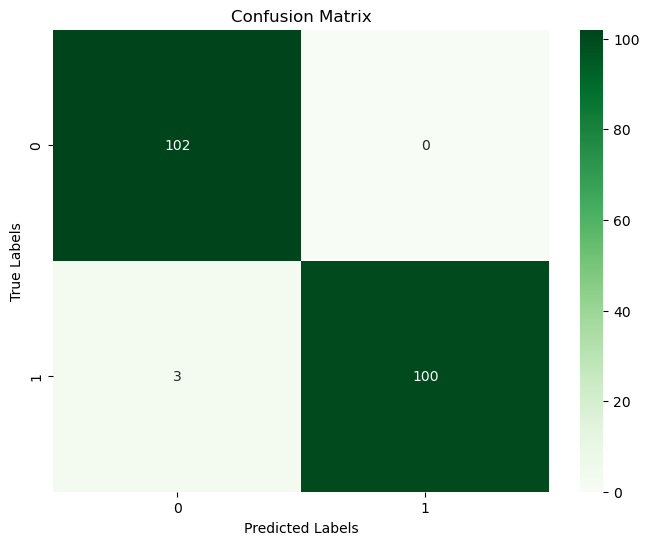

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# Model Training
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
# Make predictions
y_pred_dt = model.predict(X_test)

In [31]:
# Model Evaluation

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred_dt)
print("R-squared:", r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE) and Root MSE
mse = mean_squared_error(y_test, y_pred_dt)
print ("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.9414620217018846
Mean Absolute Error: 0.014634146341463415
Mean Squared Error: 0.014634146341463415
Root Mean Squared Error: 0.12097167578182678


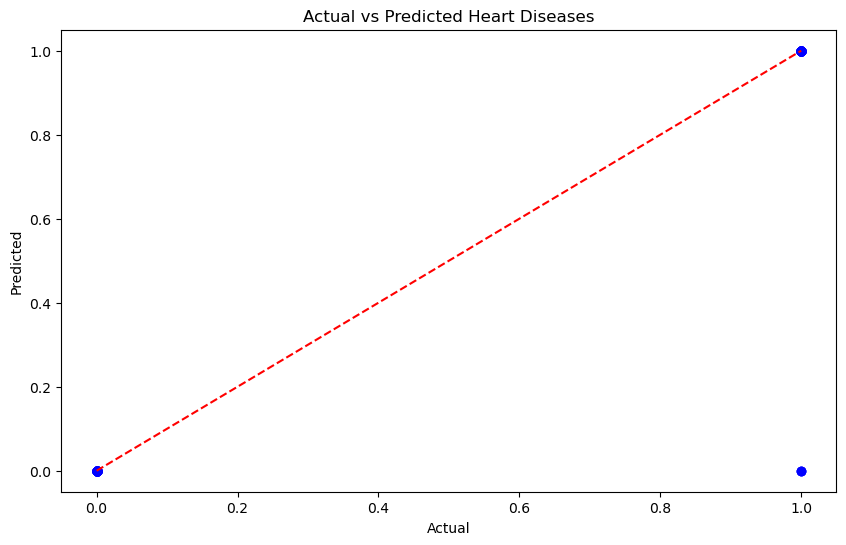

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Heart Diseases')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()